# **HWQ <font color=FC8600> 調整參數使神經網路準確率>90% </font> **



In [1]:
%env KERAS_BACKEND=tensorflow
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

env: KERAS_BACKEND=tensorflow


### <font color=1681F2> 載入MNIST數據 </font>

In [2]:
from keras.datasets import mnist

C:\Users\Hsu Chung Yuan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
len(x_train),len(x_test)

(60000, 10000)

In [5]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

### <font color=1681F2> 將input data正規化 </font>

In [6]:
x_train = (x_train - x_train.min())/(x_train.max() - x_train.min())
x_test = (x_test - x_test.min())/(x_test.max() - x_test.min())

In [7]:
x_train.max(),x_train.min()

(1.0, 0.0)

### <font color=1681F2> 將output data 轉成10個元素的矩陣 </font>

In [8]:
from keras.utils import np_utils

In [9]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [10]:
y_train[1234] 

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

### <font color=1681F2> 建立神經網路模型(3層hidden layers 分別有50,30,20個神經元,激發函數選擇 ReLU) </font>

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [12]:
model = Sequential()
model.add(Dense(50,input_dim = 784))
model.add(Activation('relu'))
model.add(Dense(30))
model.add(Activation('relu'))
model.add(Dense(20))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))


In [13]:
model.compile(loss='mse', optimizer=SGD(lr=0.05), metrics=['accuracy'])

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1530      
_________________________________________________________________
activation_2 (Activation)    (None, 30)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                620       
_________________________________________________________________
activation_3 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
__________

### <font color=1681F2> 開始訓練模型 </font>

In [15]:
model_1 = model.fit(x_train,y_train,batch_size = 20,epochs = 10)

Epoch 1/10
  560/60000 [..............................] - ETA: 58:14 - loss: 0.0903 - acc: 0.1196  

C:\Users\Hsu Chung Yuan\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.279798). Check your callbacks.
  % delta_t_median)


60000/60000 [==============================] - 48s 799us/step - loss: 0.0824 - acc: 0.2280
Epoch 2/10
60000/60000 [==============================] - 15s 256us/step - loss: 0.0494 - acc: 0.6262
Epoch 3/10
60000/60000 [==============================] - 15s 242us/step - loss: 0.0230 - acc: 0.8551
Epoch 4/10
60000/60000 [==============================] - 16s 273us/step - loss: 0.0164 - acc: 0.8951
Epoch 5/10
60000/60000 [==============================] - 16s 259us/step - loss: 0.0139 - acc: 0.9108
Epoch 6/10
60000/60000 [==============================] - 15s 251us/step - loss: 0.0124 - acc: 0.9211
Epoch 7/10
60000/60000 [==============================] - 16s 264us/step - loss: 0.0113 - acc: 0.9283
Epoch 8/10
60000/60000 [==============================] - 15s 251us/step - loss: 0.0104 - acc: 0.9340
Epoch 9/10
60000/60000 [==============================] - 16s 269us/step - loss: 0.0097 - acc: 0.9386
Epoch 10/10
60000/60000 [==============================] - 16s 263us/step - loss: 0.0091 - ac

In [16]:
predict = model.predict_classes(x_test)
predict

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [17]:
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap='Greys')
    print('神經網路判斷為:', predict[測試編號])

神經網路判斷為: 7


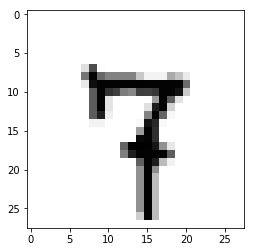

In [18]:
test(987)

### <font color=1681F2> 準確率可達93.85% </font>

In [19]:
score = model.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率', score[1])

10000/10000 [==============================] - 1s 72us/step
loss: 0.009201704171585152
正確率 0.9385
